## Import libraries and load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
iplDF = pd.read_csv('../../Datasets/cleaned_ipl_dataset_2008_to_2022.csv')

In [3]:
iplDF.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,8,MO
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,2,7,PP
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,3,1,PP
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,3,2,PP
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,3,3,PP


In [4]:
iplDF = iplDF[(iplDF.innings == 1) | (iplDF.innings == 2)]

## Additional required columns

In [5]:
iplDF['total_runs'] = iplDF.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [6]:
iplDF['isOut'] = iplDF['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [7]:
iplDF.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,total_runs,isOut
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,8,MO,4,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,2,7,PP,1,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,3,1,PP,2,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,3,2,PP,1,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,3,3,PP,0,0


## Set Team 1 and Team 2 by choosing any match using Match ID

In [8]:
iplDF.match_id.unique()

array([ 335982,  335984,  335983,  335986,  335985,  335987,  335988,
        335989,  335990,  335991,  335993,  335992,  335995,  335994,
        335996,  335997,  335998,  336000,  335999,  336001,  336003,
        336034,  336005,  336004,  336006,  336007,  336008,  336010,
        336009,  336011,  336013,  336015,  336014,  336016,  336017,
        336018,  336020,  336021,  336023,  336022,  336024,  336025,
        336026,  336027,  336029,  336028,  336031,  336032,  336033,
        336002,  336035,  336036,  336037,  336012,  336019,  336038,
        336039,  336040,  392182,  392181,  392184,  392183,  392185,
        392186,  392188,  392190,  392189,  392191,  392192,  392195,
        392194,  392197,  392196,  392198,  392200,  392199,  392202,
        392201,  392204,  392203,  392206,  392205,  392208,  392207,
        392209,  392211,  392210,  392212,  392214,  392213,  392215,
        392217,  392216,  392219,  392218,  392220,  392222,  392221,
        392223,  392

In [9]:
# Enter a Match ID of your choice from the above list MI vs CSK = 1181768
selectedMatchID = 1181768

In [10]:
t1 = iplDF[(iplDF.match_id == selectedMatchID) & (iplDF.innings == 1) & (iplDF.ball == 0.1)].batting_team.iloc[0]
t2 = iplDF[(iplDF.match_id == selectedMatchID) & (iplDF.innings == 2) & (iplDF.ball == 0.1)].batting_team.iloc[0]

In [11]:
print(Fore.RED + t1,'vs',t2)

Mumbai Indians vs Chennai Super Kings


In [12]:
iplDF[iplDF.match_id == selectedMatchID].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,total_runs,isOut
178710,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,6,MO,0,0


In [13]:
t1_outs = iplDF[iplDF.batting_team == t1].isOut.sum()
t2_outs = iplDF[iplDF.batting_team == t2].isOut.sum()

In [14]:
t1_outcomes = iplDF[iplDF.batting_team == t1].total_runs.value_counts()
t2_outcomes = iplDF[iplDF.batting_team == t2].total_runs.value_counts()

In [15]:
# Possible outcomes on a ball
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [16]:
# Create 2 lists with both the teams number of above mentioned outcomes
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [17]:
t1_outcomes_count, t2_outcomes_count

([9974, 11336, 1721, 104, 3198, 1403, 1378],
 [8661, 10515, 1706, 98, 2829, 1259, 1087])

In [18]:
# Normalize the values of the outcomes so that they will be betn 0 and 1
# Outcome Value/Total outcome value
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]
t1_pb, t2_pb

([0.3425843236930686,
  0.3893659407845023,
  0.05911245448924916,
  0.003572164594353232,
  0.10984406127636188,
  0.04818987428728447,
  0.047331180875180325],
 [0.33114127317912445,
  0.4020263811890652,
  0.06522653412349455,
  0.0037468935194035556,
  0.10816287516727204,
  0.04813611164213343,
  0.041559931179506786])

In [19]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

## Function for Runs Pediction (1st or 2nd Innings)

In [20]:
# second innings
def innings_runs(t_cum_pb, curr_overs, curr_score, curr_wickets, target=False):
    i2p_0 = t_cum_pb[0]
    i2p_1 = t_cum_pb[1]
    i2p_2 = t_cum_pb[2]
    i2p_3 = t_cum_pb[3]
    i2p_4 = t_cum_pb[4]
    i2p_6 = t_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = str(curr_overs)
    
    overslist = str(over_ball).split('.')
    
    over_number = int(overslist[0])
    
    if(len(overslist) > 1):
        ball_number = int(overslist[1])
    else:
        ball_number = 0
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
                
        if target:
            if pred_runs > target:
                break
    
    return pred_runs

## 1st Innings

In [21]:
# innings_1_runs(t1_cum_pb, curr_overs, curr_score, curr_wickets)
innings_runs(t1_cum_pb, 10.0, 100, 0)

160

In [22]:
# innings_2_runs(t2_cum_pb, curr_overs, curr_score, curr_wickets, target)
innings_runs(t2_cum_pb, 10.0, 100, 0, 150)

153

In [23]:
selectedMatchDF = iplDF[iplDF.match_id == selectedMatchID]
selectedMatchDF.reset_index(inplace = True, drop = True)
selectedMatchDF.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,total_runs,isOut
0,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,6,MO,0,0
1,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,8.4,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,8,4,MO,2,0
2,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.7,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,6,7,MO,0,0
3,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,SK Raina,SR Watson,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,6,4,MO,0,0
4,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,SK Raina,SR Watson,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm legbreak,Spin,Left Handed Bat,LHB,1,1,1,1,1,1,1,7,1,MO,1,0


In [24]:
df_ing1 = selectedMatchDF[selectedMatchDF.innings == 1]
df_ing2 = selectedMatchDF[selectedMatchDF.innings == 2]

In [25]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [26]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [27]:
df_ing1.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,total_runs,isOut
0,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Right-arm medium,Pace,Left Handed Bat,LHB,1,1,1,1,1,1,1,0,1,PP,1,0


In [28]:
df_ing2.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,bowl_style,bowling_style,bat_style,batting_style,wides_cnt_balls,noballs_cnt_balls,noballs_cnt_balls_bowler,byes_cnt_balls,legbyes_cnt_balls,legal_ball,legal_ball_bowler,over_no,ball_no,phase,total_runs,isOut
0,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,0.1,Chennai Super Kings,Mumbai Indians,F du Plessis,SR Watson,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-arm fast-medium,Pace,Right Handed Bat,RHB,1,1,1,1,1,1,1,0,1,PP,0,0


## Runs Prediction: 1st Innings

In [29]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]
    
    prediction = innings_runs(t1_cum_pb, curr_overs, curr_score, curr_wickets)
    ing1_runs_pred.append(prediction)

In [30]:
ing1_actual_score = sum(df_ing1.total_runs)

## Runs Prediction: 2nd Innings

In [31]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_runs(t2_cum_pb, curr_overs, curr_score, curr_wickets, target)
    ing2_runs_pred.append(prediction)

In [32]:
ing2_actual_score = sum(df_ing2.total_runs)

## Runs Prediction Chart: 1st Innings

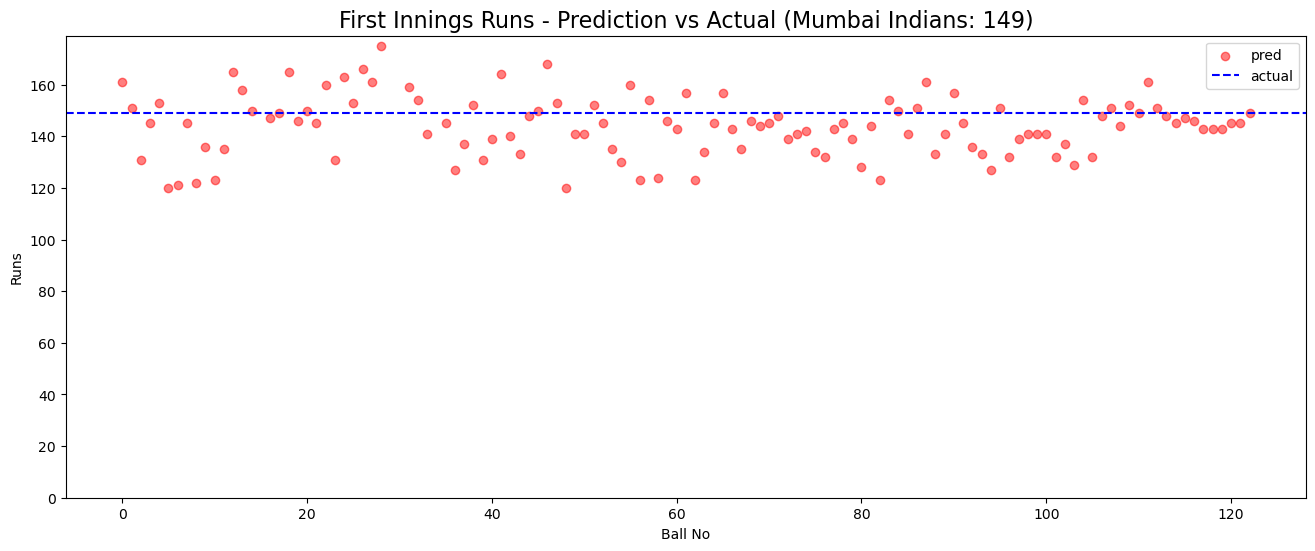

In [33]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'blue')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

## Error in 1st Innings Runs:

In [34]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

10.821138211382113

## Runs Prediction Chart: 2nd Innings

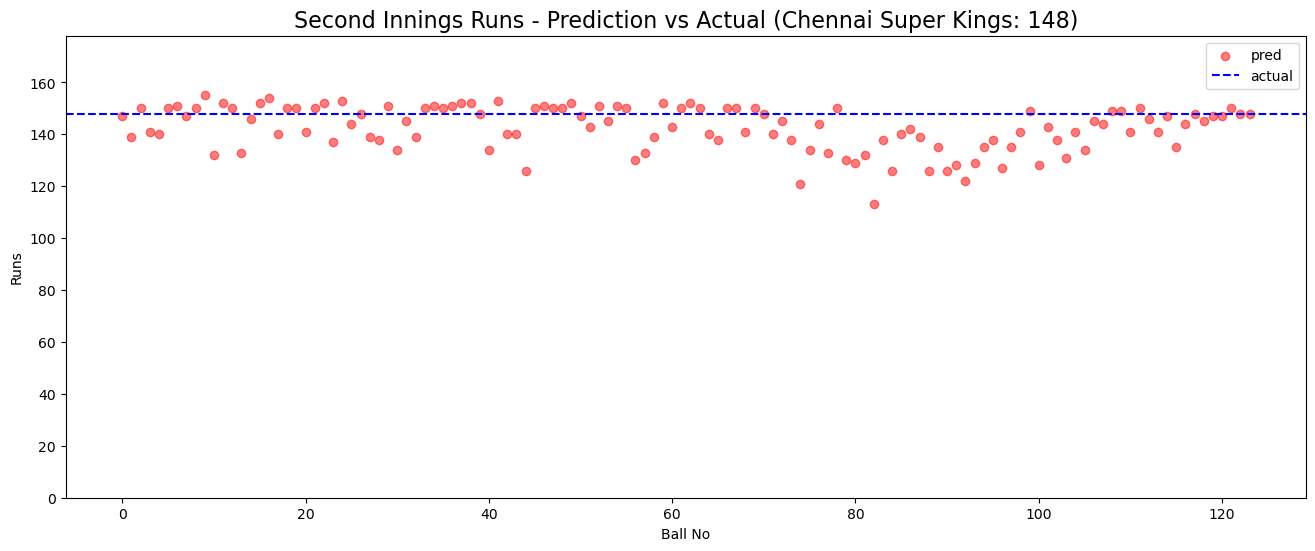

In [35]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'blue')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

## Error in 2nd Innings Runs:

In [36]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

7.395161290322581

## Win Predictions for 1st Innings

In [37]:
# 1, 2 innings & predict win 

# for each ball make a prediction: 1st runs, 2nd runs, win/lose/tie

# initialize win/tie/lose
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_runs(t1_cum_pb, ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_runs(t2_cum_pb, ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

## Win Predictions for 2nd Innings

In [38]:
# each ball
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    # 1st innings values
    target = ing1_actual_score
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        ing2_prediction = innings_runs(t2_cum_pb, ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

## Win Percentage Chart

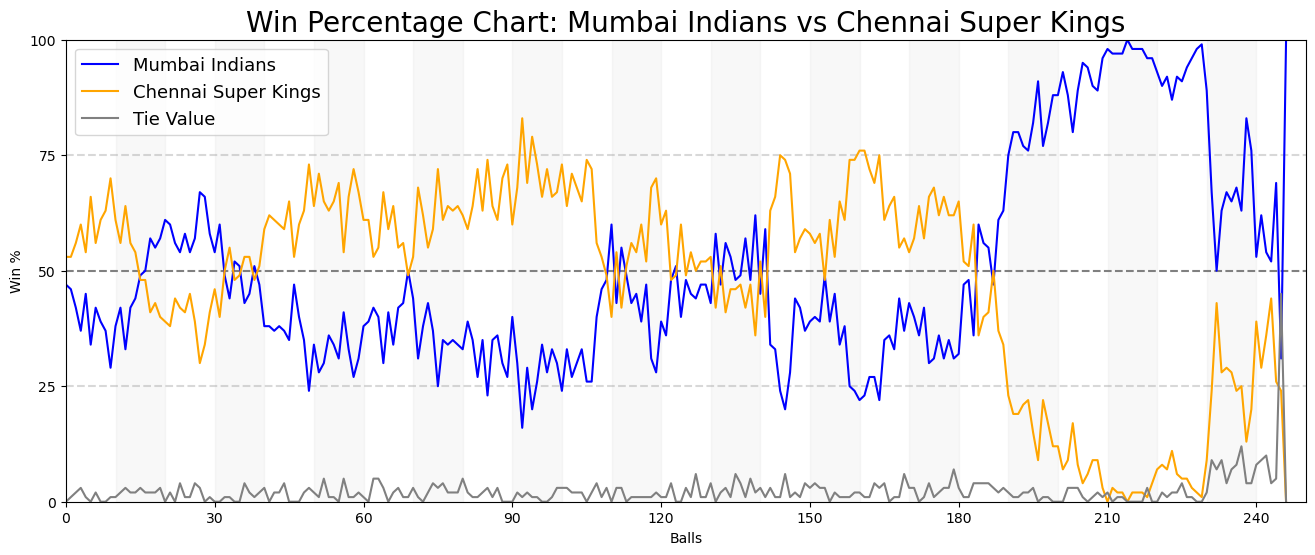

In [39]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(selectedMatchDF), 20):
    if i < len(selectedMatchDF) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x3_values, y3_values, color = 'blue', label = t1)
plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.rcParams['font.size'] = 13


plt.xlim(0, 250)
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240])

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 20)
plt.xlabel('Balls')
plt.ylabel('Win %')
plt.legend()
plt.show()

# Interactive Model for Chasing Team Expected Score

In [40]:
def get_win(pred_runs, target):
    if pred_runs > target:
        return 'win'
    elif pred_runs == target:
        return 'tie'
    else:
        return 'lose'

In [41]:
# find out runs:
def find_runs(current_score, target, current_wickets, at_overs):
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(current_score, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = innings_runs(t2_cum_pb, at_overs, i, current_wickets, target)
            
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

            win_ls.append(win_count)
            req_runs.append(i)
            # print('runs: ', i, ' win%: ', win_count)

    required_runs = current_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            # print('Runs to be: ', req_runs[i])
            break

    return required_runs


In [42]:

def find_wickets(current_score, target, current_wickets, at_overs):

#     find_runs(current_score, target, current_wickets, at_overs)
    req_runs = find_runs(current_score, target, current_wickets, at_overs)

    runs_ls = []
    results_ls = []

    req_wks = []
    win_ls = []

    for i in range(current_wickets, 10):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = innings_runs(t2_cum_pb, at_overs, current_score, i, target)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

        win_ls.append(win_count)
        req_wks.append(i)
#         print('wickets: ', i, ' win%: ', win_count)

    req_wicket_value = current_wickets
    
    for i in range(len(req_wks)):
        if (win_ls[i] < 45)  :
            req_wicket_value = req_wks[i]
            break

    return req_wicket_value

In [43]:
from ipywidgets import interactive
import ipywidgets as widgets

curr_runs = 60
curr_overs = 5
curr_wkts = 2

# Get the team Initials
def getTeamShortForm(team):
    
    fl = next(zip(*team.split()))

    tm = ''
    for i in range(len(fl)):
        tm += fl[i].upper()
    
    return tm

# Calculate and plot the expected score acc to the given current conditions
def find_runs_wickets(current_wks, at_overs, target_score):
    
    plt.figure(figsize = (16, 6))
    # x = np.linspace(-10, 10, num=1000)
    x = np.array(list(range(21)))
    req_value = find_runs(curr_runs, target_score, current_wks, at_overs)
    req_wk_value = find_wickets(curr_runs, target_score, current_wks, at_overs)

    if at_overs == curr_overs:
        req_value = curr_runs
        req_wk_value = curr_wkts

    
    y = np.array([req_value for i in range(21)])

    plt.scatter(at_overs, req_value, s = 2000, color = 'yellow')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, getTeamShortForm(t1) + ' Final Score: ' + str(ing1_actual_score) + '\n'+ getTeamShortForm(t2) +' Target Score:' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'blue', fontsize = 14,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, getTeamShortForm(t2) + ' has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center')
    plt.ylim(0, target_score + 50)
    plt.xticks(x)
    plt.title('Where should '+ t2 +' be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

## Create a small interactive tool to check various scores according to the conditions

In [44]:
print('Current Score = '+ getTeamShortForm(t2) +': '+ str(curr_runs) +'/'+ str(curr_wkts) +' ('+ str(curr_overs) +' overs)\n')

interactive_plot = interactive(find_runs_wickets, current_wks = widgets.IntSlider(min=1, max=10, step=1, value=curr_wkts),  at_overs=widgets.IntSlider(min=curr_overs, max=19, step=1, value=curr_overs), target_score = widgets.IntSlider(min=0, max=250, step=1, value=ing1_actual_score+1))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

Current Score = CSK: 60/2 (5 overs)



interactive(children=(IntSlider(value=2, description='current_wks', max=10, min=1), IntSlider(value=5, descrip…